## The Travel Salesperson problem

### The travelling salesperson problem (TSP) is a classic optimization problem where the goal is to determine the shortest tour of a collection of $n$ “cities” (i.e. nodes), starting and ending in the same city and visiting all of the other cities exactly once.

### In such a situation, a solution can be represented by a vector of n integers, each in the range 0 to n-1, specifying the order in which the cities should be visited.

### Example

### Consider the following map containing 8 cities, numbered 0 to 7.

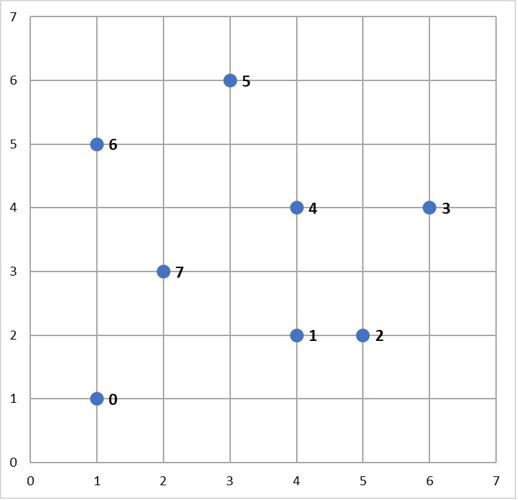

In [4]:
from IPython.display import Image
Image(filename='TSP1.jpeg')

### One possible tour of the cities is illustrated below, and could be represented by the solution vector x = [0, 4, 2, 6, 5, 3, 7, 1] (assuming the tour starts and ends at City 0).

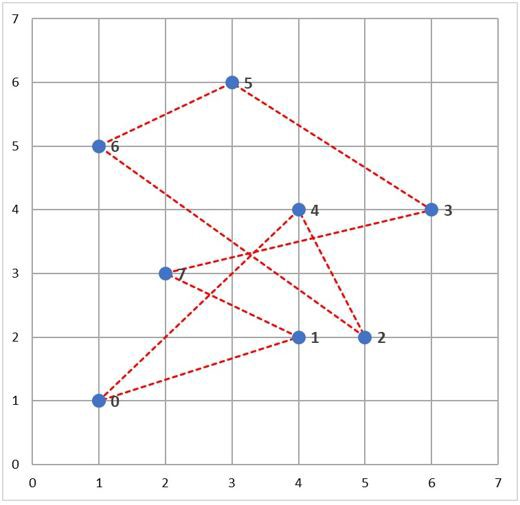

In [5]:
from IPython.display import Image
Image(filename='TSP2.jpeg')

### However, this is not the shortest tour of these cities. The aim of this problem is to find the shortest tour of the 8 cities.

### We solve the TSP problem by using a discrete randomized optimization algorithm.

### The steps required to solve this problem are given as follows:

### 1. Define a fitness function object.
### 2. Define an optimization problem object.
### 3. Select and run a randomized optimization algorithm.

In [24]:
import numpy as np
from collections import defaultdict

### input is an ordered list of pairs (where pair $i$ specifies the coordinates of city $i$)

In [25]:
# To define a function to evaluate the travel distance between two cities.
def distance_btn_two_cities(a,b):
    x = a[0] - b[0]
    y = a[1] - b[1]
    return np.sqrt(x*x+y*y)

In [22]:
a=(1,1)
b=(4,2)

In [26]:
distance_btn_two_cities(a,b)

3.1622776601683795

In [8]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

In [9]:
dist_list = {(x,y):distance_btn_two_cities(x,y) for x in coords_list for y in coords_list if x != y}

In [10]:
list(dist_list.items())[:10]

[(((1, 1), (4, 2)), 3.1622776601683795),
 (((1, 1), (5, 2)), 4.123105625617661),
 (((1, 1), (6, 4)), 5.830951894845301),
 (((1, 1), (4, 4)), 4.242640687119285),
 (((1, 1), (3, 6)), 5.385164807134504),
 (((1, 1), (1, 5)), 4.0),
 (((1, 1), (2, 3)), 2.23606797749979),
 (((4, 2), (1, 1)), 3.1622776601683795),
 (((4, 2), (5, 2)), 1.0),
 (((4, 2), (6, 4)), 2.8284271247461903)]

In [11]:
dist_list.get(((1,1),(4,2)),999)

3.1622776601683795

In [12]:
#a function to calculate the total travelled distance
#a_route is a ordered sequence of cities travelled.
def get_dist(a,b):
    return dist_list.get((a,b),999)

def total_dist_travelled(a_route):
    s1 = sum([get_dist(a_route[i],a_route[i+1]) for i in range(len(a_route)-1)])
    s2 = get_dist(a_route[-1],a_route[0])
    return s1+s2

In [28]:
a_seq = np.random.permutation(7)

In [29]:
a_seq

array([3, 1, 2, 4, 5, 0, 6])

In [54]:
a_route = [coords_list[i] for i in a_seq]
a_route

[(4, 4), (3, 6), (5, 2), (6, 4), (4, 2), (1, 5), (1, 1)]

In [55]:
total_dist_travelled(a_route)

24.25798040898392

### Because two routes are equivalent if one can be reached by rotating the elements of the other.

In [147]:
#define a function to generate a rotation
#n is the number of shifts
def leftShift(tup,n):
    a = tup[n:]
    a.extend(tup[:n])
    return a

In [138]:
a_route = [(5, 2), (1, 5), (6, 4), (4, 2), (4, 4), (3, 6), (1, 1)]

In [148]:
leftShift(a_route,1)

[(1, 5), (6, 4), (4, 2), (4, 4), (3, 6), (1, 1), (5, 2)]

In [149]:
#This function generates all rotations
def generate_rotations(tup):
    ps=[]
    for n in range(len(tup)):
        ps.append(leftShift(tup,n))
    return ps

In [151]:
ps = generate_rotations(a_route)
ps

[[(5, 2), (1, 5), (6, 4), (4, 2), (4, 4), (3, 6), (1, 1)],
 [(1, 5), (6, 4), (4, 2), (4, 4), (3, 6), (1, 1), (5, 2)],
 [(6, 4), (4, 2), (4, 4), (3, 6), (1, 1), (5, 2), (1, 5)],
 [(4, 2), (4, 4), (3, 6), (1, 1), (5, 2), (1, 5), (6, 4)],
 [(4, 4), (3, 6), (1, 1), (5, 2), (1, 5), (6, 4), (4, 2)],
 [(3, 6), (1, 1), (5, 2), (1, 5), (6, 4), (4, 2), (4, 4)],
 [(1, 1), (5, 2), (1, 5), (6, 4), (4, 2), (4, 4), (3, 6)]]

In [155]:
#if we encounter a permutation that is a rotation of any of the previous permutations, no calculation is required.
min_dist = 1000
ps = []
for i in range(1000):
    a_seq = np.random.permutation(7)
    a_route = [coords_list[i] for i in a_seq]
    if a_route not in ps:
        d = total_dist_travelled(a_route)
        if d < min_dist:
            min_dist = d
            min_route = a_route
    ps.extend(generate_rotations(a_route))

In [156]:
min_route

[(4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (1, 1)]

In [157]:
min_dist

16.870481592667748